In [1]:
import torch
import fastai
torch.__version__
fastai.__version__

'2.7.12'

In [2]:
# pip install fastai==2.7.12

### Datasets

In [3]:
# datasets ga link
# https://storage.googleapis.com/openimages/web/index.html?ysclid=ljd2s4kmqx18761497
# rasmga link
# https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy_visualizer/circle.html

### toolkini yuklab olish


In [4]:
! git clone https://github.com/EscVM/OIDv4_ToolKit.git

Y
Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 18.79 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [5]:
# kerakli kututubxonalarni ornatib olamiz
! cd OIDv4_ToolKit/ && pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 23.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PyYAML: filename=PyYAML-5.4.1-cp310-cp310-linux_x86_64.whl size=45658 sha256=45f6b5b5456ee3c83e3d43c6a4a62e53af9f0edd999486811d3eb9add8b4c8ed
  Stored in directory: /root/.cache/pip/wheels/c7/0d/22/696ee92245ad710f506eee79bb05c740d8abccd3ecdb778683
Successfully built PyYAML
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting un

In [6]:
# main.py orqali nimalarni qila olishimiz munkunligi haqida malumot olishimiz munkun
! cd  OIDv4_ToolKit/ && python main.py -h

usage: main.py
       [-h]
       [--Dataset /path/to/OID/csv/]
       [-y]
       [--classes list of classes [list of classes ...]]
       [--type_csv 'train' or 'validation' or 'test' or 'all']
       [--sub Subset of human verified images or machine generated (h or m)]
       [--image_IsOccluded 1 or 0]
       [--image_IsTruncated 1 or 0]
       [--image_IsGroupOf 1 or 0]
       [--image_IsDepiction 1 or 0]
       [--image_IsInside 1 or 0]
       [--multiclasses 0 (default) or 1]
       [--n_threads [default 20]]
       [--noLabels]
       [--limit integer number]
       <command>
       'downloader',
       'visualizer'
       or
       'ill_downloader'.

Open Image
Dataset
Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
    'downloader
    ', 'visuali
    zer' or 'il
    l_downloade
    r'.

options:
  -h, --help
    show this
    help
    message and
    exit
  --Dataset /path/to/OID/csv/
    Directory
    of the OID
    dataset
    f

datasetdan (Bird, Bear, Fish) dan foydalanaman

In [7]:
# datasetdan kerali clasga doir ntdan rasmlarni yuklab olsh uchun
! cd OIDv4_ToolKit/ && python3 main.py downloader --Dataset /content --classes Bird Fish Bear --type_csv train --limit 300


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Bird.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 73986 KB/s, 0 seconds passed
[DOWNLOAD] | File cla

### Model

In [13]:
from fastai.vision.all import *
from ipywidgets import widgets

#  path
path = Path('train')
# path.ls()
fls = get_image_files(path)
# rasmlarda yuklashdan keyingi nuqsonlarni aniqlash uchun
failed = verify_images(path)
failed

'PosixPath' object is not iterable


(#0) []

In [16]:
# datablockni yaratish
jonzods = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    # har bir rasmlarni nomini labillab yani papka nomiga ozgartirib oladi
    get_y=parent_label,
    # rasmlarni standart olchmga keltirib olish
    item_tfms=Resize(224)
)

In [17]:
# Dataloders yaratamiz
dls = jonzods.dataloaders(path)

In [19]:
# datasetsni tekshirib nta rasmni nta qatorda chiqarishimiz munkun
dls.train.show_batch(max_n=32, nrows=4)

Output hidden; open in https://colab.research.google.com to view.

In [20]:
# train (o`qitish)
# algoritm resnet34
learn = cnn_learner(dls, resnet34, metrics=accuracy)
# 4 ta epokdan foydalandim
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,1.263790,0.394490,0.888889,00:23


epoch,train_loss,valid_loss,accuracy,time
0,0.305210,0.267299,0.911111,00:18
1,0.205830,0.279530,0.922222,00:21
2,0.146194,0.269389,0.916667,00:19
3,0.109184,0.253537,0.916667,00:19


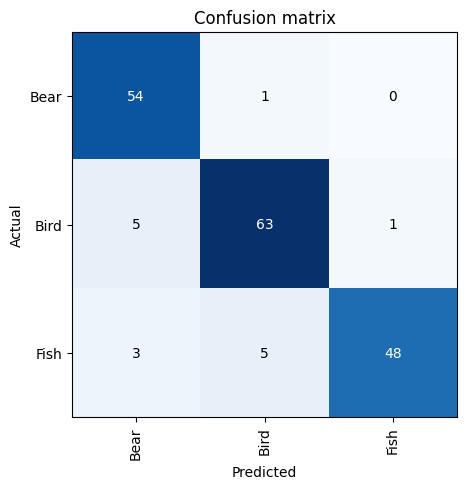

In [22]:
# tekshirish
# nechta xato va nechta to`g`riligini korsatadi
interp = ClassificationInterpretation.from_learner(learn)
# grafik matix korinishda korsatadi
interp.plot_confusion_matrix()

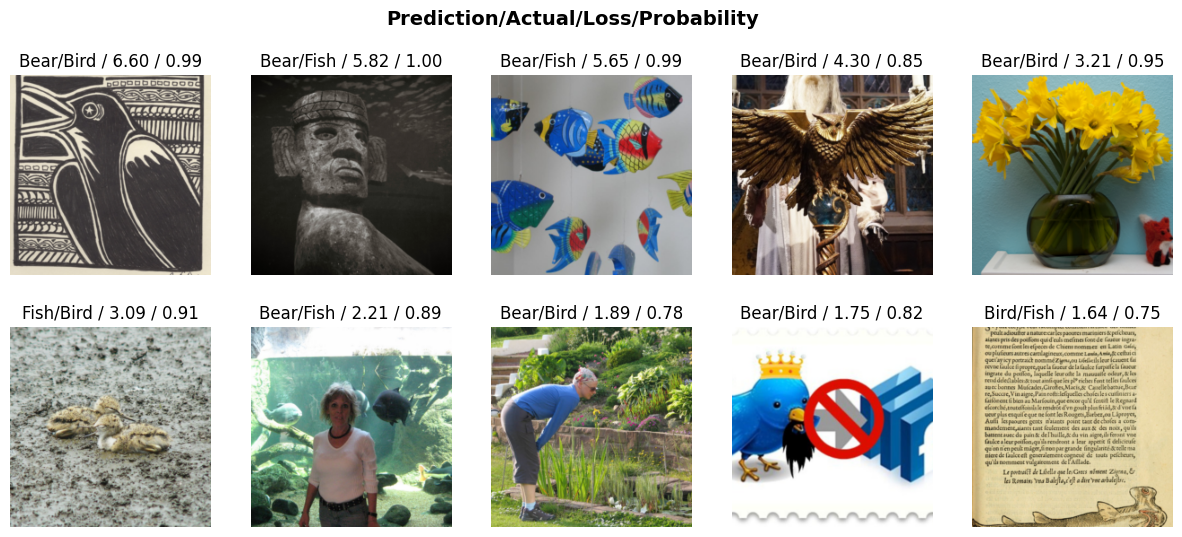

In [23]:
# eng katta hatolarimizni korishimiz munkun
interp.plot_top_losses(10, nrows=2)

## modelni qolda tekshirib koramiz

In [30]:
# fayl yuklash uchun
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

In [36]:
# upoaddan kelayotgan malumotni ushlab olish
img = PILImage.create(upload.data[-1])
# kelayotgan rasni modelga jonatib tekshiramiz
pred, pred_id, probs = learn.predict(img)
print(f'Bashorat:{pred}')
print(f'Ehtimolik:{probs[pred_id]*100//1}%')
img

Output hidden; open in https://colab.research.google.com to view.

### Modelni mahsulotgacha

### Deploy qilish

## Streamlit Cloudga deploy qilanadi

### o`qitilgan modelni saqlab olamish

In [38]:
learn.export('jonzod_model.pkl')

### o`qitilgan modelni yuklab olib tekshirinb koramiz

In [40]:
model = load_learner('/content/jonzod_model.pkl')


In [42]:
# ishlayaptimi tekshiramiz
model.predict(img)

('Bird', tensor(1), tensor([3.4234e-04, 9.9938e-01, 2.7874e-04]))